# Matplotlib and more

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.

For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.


In [1]:
%matplotlib inline

## Simple plot

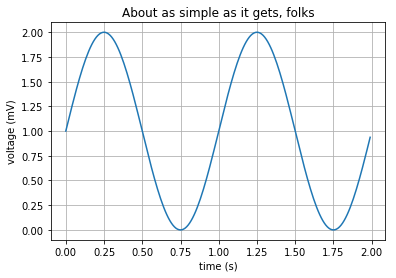

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='About as simple as it gets, folks')
ax.grid()

plt.show()

## Histogram

In addition to the basic histogram, this demo shows a few optional features:

- Setting the number of data bins.
- The normed flag, which normalizes bin heights so that the integral of the histogram is 1. The resulting histogram is an approximation of the probability density function.
- Setting the face color of the bars.
- Setting the opacity (alpha value).

Selecting different bin counts and sizes can significantly affect the shape of a histogram. The Astropy docs have a great section on how to select these parameters.

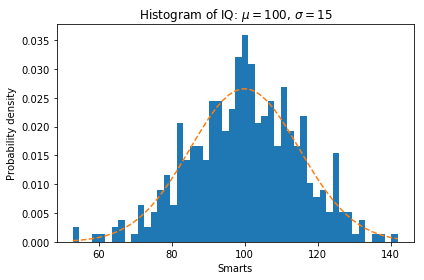

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Streamline Plot

A stream plot, or streamline plot, is used to display 2D vector fields. This example shows a few features of the streamplot() function:

- Varying the color along a streamline.
- Varying the density of streamlines.
- Varying the line width along a streamline.
- Controlling the starting points of streamlines.
- Streamlines skipping masked regions and NaN values.

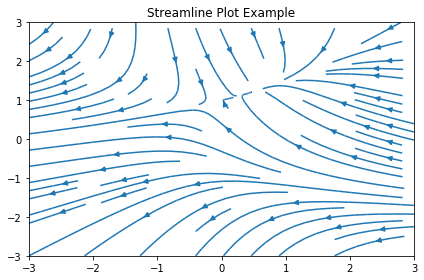

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]    # Create a 100x100 mesh-grid
U = -1 - X**2 + Y                        # Define U
V = 1 + X - Y**2                         # Define V
speed = np.sqrt(U*U + V*V)

#  Varying density along a streamline
plt.streamplot(X, Y, U, V, density=[0.5, 1])
plt.title('Streamline Plot Example')

plt.tight_layout()
plt.show()

## 3D Plot: The Lorenz Attractor

This is an example of plotting Edward Lorenz's 1963 ["Deterministic Nonperiodic Flow" in a 3-dimensional space using mplot3d.]( http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2)

Note: Because this is a simple non-linear ODE, it would be more easily
done using SciPy's ode solver, but this approach depends only upon NumPy

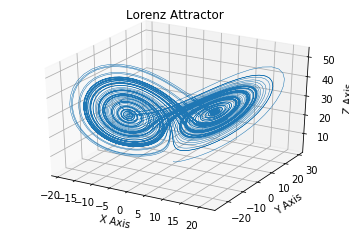

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty((num_steps + 1,))
ys = np.empty((num_steps + 1,))
zs = np.empty((num_steps + 1,))

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

# Sounding Plot

With additional package `MetPy`, making a Skew-T LogP plot is as straightforward as possible.

Cannot import USCOUNTIES without cartopy installed.


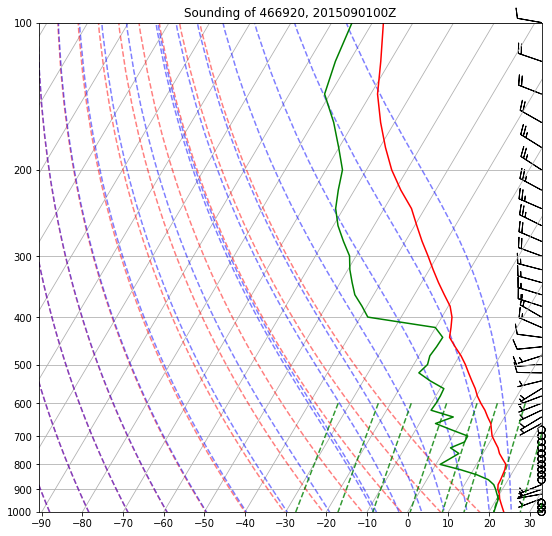

In [6]:
# A sample sounding data is stored in ../data/sounding_466920_2015110700.txt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import SkewT
from metpy.units import units

# Read a sounding data
col_names = ["stdid","time", "p","t","td","wd","ws","qv"]
df = pd.read_fwf("../data/sounding_466920_2015110700.txt", names=col_names)

# Convert wd/ws to u/v
df['u'], df['v'] = mpcalc.wind_components(df['ws'],np.deg2rad(df['wd']))

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('t','td','wd','ws','u','v'), how='all').reset_index(drop=True)

# Pull data colume out into individual variables and assign units.
p = df['p'].values * units.hPa
T = df['t'].values * units.degC
Td = df['td'].values * units.degC
ws = df['ws'].values * units.knots
wd = df['wd'].values * units.degrees
qv = df['qv'].values * units('g/kg')
u, v = mpcalc.wind_components(ws, wd)

# Plot
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(df['p'], df['t'], 'r')
skew.plot(df['p'], df['td'], 'g')
skew.plot_barbs(df['p'], df['u'], df['v'])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

plt.title('Sounding of 466920, 2015090100Z')
# Show the plot
plt.show()